# Prediction Using Decision Tree
Predicting the class of flowers based on iris dataset

In [72]:
#Importing the dataset
import numpy as np
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import datasets

### Loading the Dataset
We are using the inbuilt iris datset in sklearn.datsets which is a family of flower containing three type of flower called setosa ,versicolor and Virginica. Using the features of these flowers we need to classify them.

In [26]:
iris=datasets.load_iris()

Iris dataset has 4 features: sepal length, sepal width, petal length, petal width. On the basis of features we will decide that in which category the flower belong to.

In [27]:
print("Features :",iris.feature_names)
print("Target: ",iris.target_names)

Features : ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target:  ['setosa' 'versicolor' 'virginica']


Converting the dataset to dataframe

In [38]:
iris_df=pd.DataFrame(iris.data,columns=iris.feature_names)

In [40]:
X=iris_df.iloc[:,0:4]
y=iris.target

In [41]:
print(X.shape)
print(y.shape)

(150, 4)
(150,)


X have 150 rows i.e. samples and 4 columns i.e. features

In [42]:
print(X)
print(y)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

y output categories are 0,1 and 2,  setosa ,versicolor and virginica

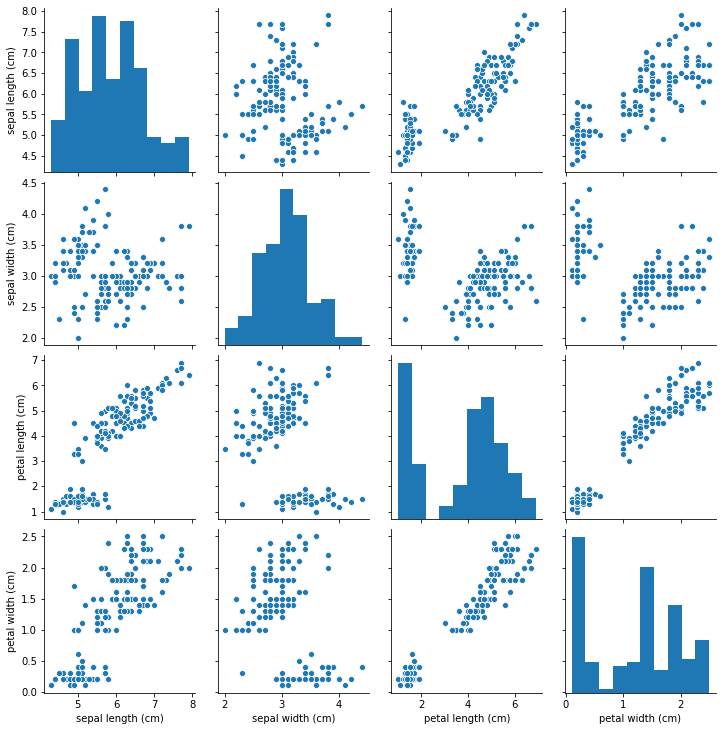

In [44]:
sns.pairplot(X)
plt.show()

### Training the Model
**Desicion Tree Classifier**:It is a supervised learning algorithm which is used for both classification and regression problems in the form of trees that can be incrementally updated by splitting the dataset into smaller datasets. The result is stored in the leaf node.  Decision tree is a tree shaped  flowchart-like structure (reversed tree) with nodes (leaf), branches and  decision making conditions

In [73]:
#Spliting the dataset into training and test set
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=3)

In [75]:
#Decision Tree Classifier
dtc=DecisionTreeClassifier()
#Training the dataset
dtc.fit(X_train,y_train)

DecisionTreeClassifier()

In [76]:
#Making prediction on the test dataset
y_pred=dtc.predict(X_test)

In [77]:
#Printing the actual and predicted dataset
print('Actual_Value: {} \n  Predicted_Value: {}'.format(y_test,y_pred))

Actual_Value: [0 0 0 0 0 2 1 0 2 1 1 0 1 1 2 0 1 2 2 0 2 2 2 1 0 2 2 1 1 1 0 0 2 1 0 0 1
 0] 
  Predicted_Value: [0 0 0 0 0 2 1 0 2 1 1 0 1 1 2 0 1 2 2 0 2 2 2 1 0 2 2 1 1 1 0 0 2 1 0 0 2
 0]


In [62]:
#Calculating the accuracy score
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9473684210526315

The model is 94.7% accurate.

#### Representing the Decision Tree Model using text and plotting the graph

In [70]:
#text representation
from sklearn import tree
text=tree.export_text(dtc)
print(text)

|--- feature_3 <= 0.80
|   |--- class: 0
|--- feature_3 >  0.80
|   |--- feature_3 <= 1.65
|   |   |--- feature_2 <= 4.95
|   |   |   |--- class: 1
|   |   |--- feature_2 >  4.95
|   |   |   |--- feature_1 <= 2.75
|   |   |   |   |--- feature_1 <= 2.45
|   |   |   |   |   |--- class: 2
|   |   |   |   |--- feature_1 >  2.45
|   |   |   |   |   |--- class: 1
|   |   |   |--- feature_1 >  2.75
|   |   |   |   |--- class: 2
|   |--- feature_3 >  1.65
|   |   |--- feature_2 <= 4.85
|   |   |   |--- feature_1 <= 3.10
|   |   |   |   |--- class: 2
|   |   |   |--- feature_1 >  3.10
|   |   |   |   |--- class: 1
|   |   |--- feature_2 >  4.85
|   |   |   |--- class: 2



Petal length (X[2]) and Petal width (X[3]), are needed to provide a very high degree of accuracy. The X[1] parameter for sepal width is also brought to bear to make the finest distinctions, but ultimately doesn't bring much value.

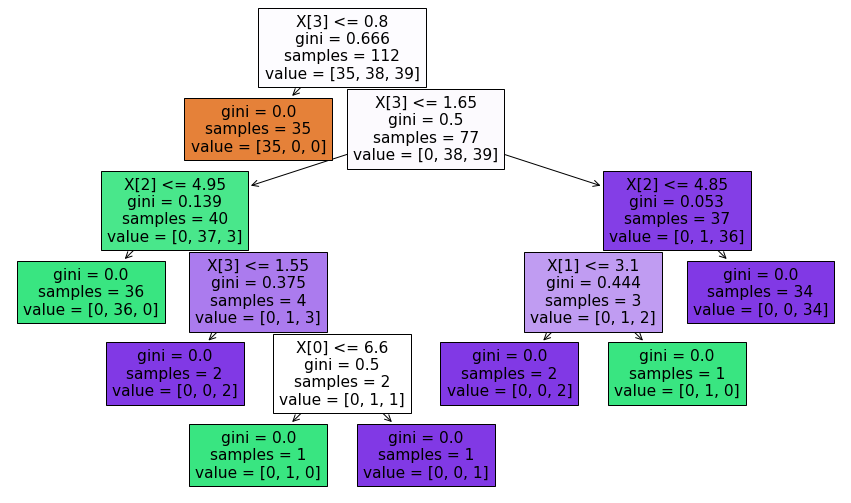

In [78]:
#Potting the figure
plt.figure(figsize=(15,9))
tree.plot_tree(dtc,filled=True)
plt.show()

How to decide which feature should be located at the root node<br>
Most accurate feature to serve as internal nodes or leaf nodes,<br>
How to divide tree,<br>
How to measure the accuracy of splitting tree and many more.

For this we have,<br>
**Entropy**: It calculates the impurity or randomness of the dataset. The higher the entropy, the harder it is to draw any conclusions from that information.<br>
**Information Gain**: Information Gain is applied to quantify which feature provides maximal information about the classification based on the notion of entropy.<br>
**Gini Index**: Calculates the amount of probability of a specific feature that is classified incorrectly when selected randomly. If all the elements are linked with a single class then it can be called pure. Gini index operates on the categorical target variables in terms of “success” or “failure” and performs only binary split, in opposite to that Information Gain computes the difference between entropy before and after the split and indicates the impurity in classes of elements.